# Ecuaciones No Lineales

 


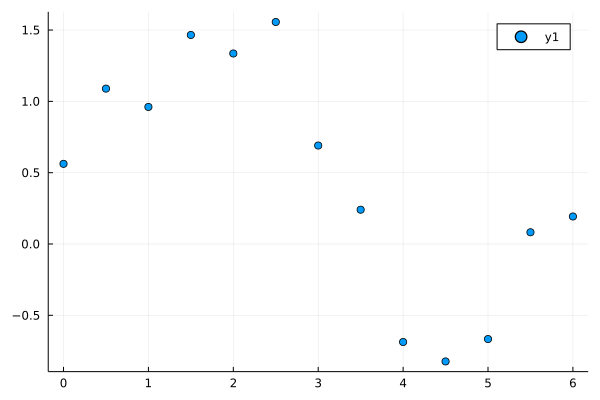

In [24]:
using LinearAlgebra,Plots;

x=0:.5:2*pi;
y=sin.(x)+rand(length(x));
n=length(x);
plot(x,y,seriestype = :scatter)

Ajustamos un polinomio de orden 1 y chequeamos el valor de la suma cuadratica de los residuos

$RSS= \sum_{i=1}^{n}\{y_i - f(\mathbf{x_i};\hat{\theta})\}^2$

In [25]:

X=hcat(ones(n),x);

print("El rango de la matriz X es : ",rank(X))

El rango de la matriz X es : 2

In [26]:
size(X)

(13, 2)

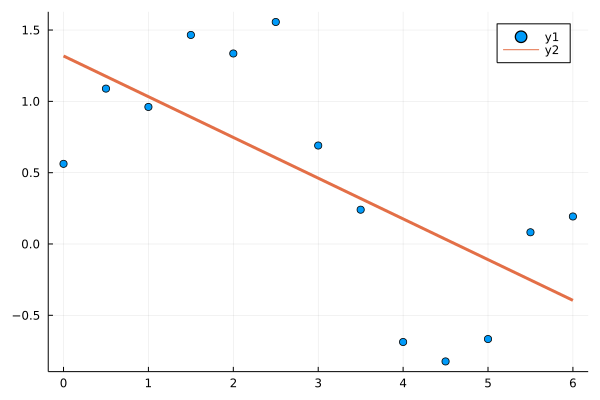

In [27]:
w=X\y
y_hat=X*w

plot(x,y,seriestype = :scatter)
plot!(x,y_hat,lw=3)


In [28]:
w

2-element Vector{Float64}:
  1.3180182181992277
 -0.2855371512779715

In [29]:
print("RSS : ",sum((y.-y_hat).^2))

RSS : 4.4726420749387605

Ajustamos un polinomio de orden 2

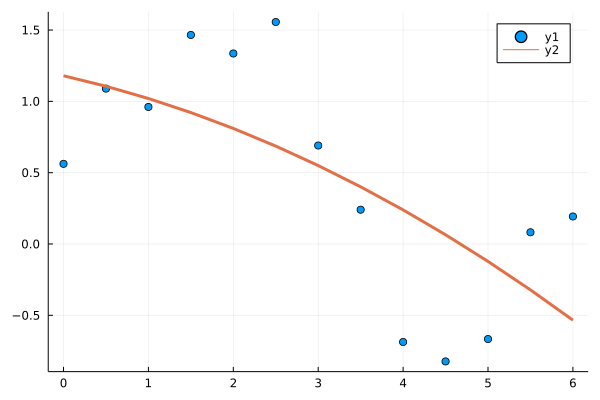

In [30]:
X=hcat(ones(n),x,x.^2);
w=X\y;
y_hat=X*w;
plot(x,y,seriestype = :scatter)
plot!(x,y_hat,lw=3)

In [31]:
print("El rango de la matriz X es : ",rank(X));
println(", RSS : ",sum((y.-y_hat).^2));

El rango de la matriz X es : 3, RSS : 4.392923316154066


Ajustamos un polinomio de orden 3

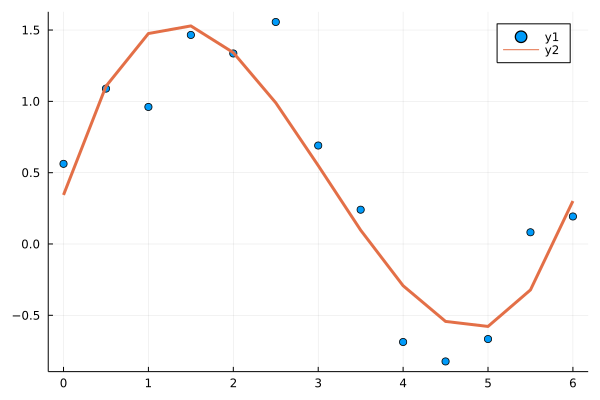

In [41]:
X=hcat(ones(n),x,x.^2,x.^3);
w=X\y
y_hat=X*w
plot(x,y,seriestype = :scatter)
plot!(x,y_hat,lw=3)

In [34]:
x_new=minimum(x):0.1:maximum(x)
n_new=length(x_new)
X_new=hcat(ones(n_new),x_new,x_new.^2,x_new.^3);

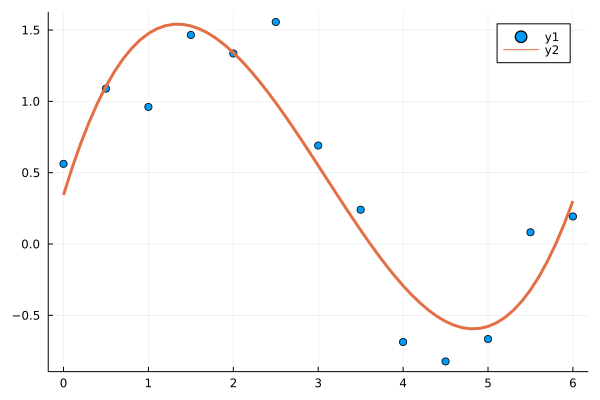

In [35]:
y_hat=X_new*w
plot(x,y,seriestype = :scatter)
plot!(x_new,y_hat,lw=3)

In [36]:
y_hat=X*w;
print("El rango de la matriz X es : ",rank(X));
println(", RSS : ",sum((y.-y_hat).^2));

El rango de la matriz X es : 4, RSS : 1.0948839837631956


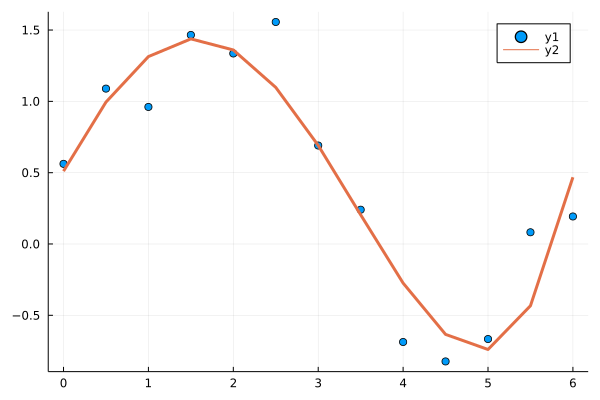

In [37]:
X=hcat(ones(n),x,x.^2,x.^3,x.^4);
w=X\y
y_hat=X*w
plot(x,y,seriestype = :scatter)
plot!(x,y_hat,lw=3)

In [38]:
print("El rango de la matriz X es : ",rank(X));
println(", RSS : ",sum((y.-y_hat).^2));

El rango de la matriz X es : 5, RSS : 0.902023588918587


In [40]:
import Pkg;

Pkg.add("CurveFit");

    Updating registry at `~/.julia/registries/General.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [42]:
using CurveFit

fit = curve_fit(Polynomial, x, y, 3)


Polynomial(0.34393045161995506 + 1.9667192473966226*x - 0.9364357169294554*x^2 + 0.10124384670382368*x^3)

In [43]:
w

4-element Vector{Float64}:
  0.3439304516199521
  1.9667192473966209
 -0.9364357169294545
  0.10124384670382358

# 2) Ejercicios 


2.1)Use un sistema de ecuaciones no lineales para predecir el consumo de gasolina de un vehiculo dependiendo del peso, desplazamiento, caballos de fuerza y aceleración de este. Descargue los datos desde :

https://archive.ics.uci.edu/ml/datasets/auto+mpg

In [44]:
using Downloads
using CSV
using CurveFit

In [45]:
file=Downloads.download("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

"/var/folders/wd/0sm_658d23ldnfyfjn6y4s6m0000gn/T/jl_dZXDys"

In [46]:
using DelimitedFiles

data=readdlm(file)

398×9 Matrix{Any}:
 18.0  8  307.0  130.0  3504.0  12.0  70  1  "chevrolet chevelle malibu"
 15.0  8  350.0  165.0  3693.0  11.5  70  1  "buick skylark 320"
 18.0  8  318.0  150.0  3436.0  11.0  70  1  "plymouth satellite"
 16.0  8  304.0  150.0  3433.0  12.0  70  1  "amc rebel sst"
 17.0  8  302.0  140.0  3449.0  10.5  70  1  "ford torino"
 15.0  8  429.0  198.0  4341.0  10.0  70  1  "ford galaxie 500"
 14.0  8  454.0  220.0  4354.0   9.0  70  1  "chevrolet impala"
 14.0  8  440.0  215.0  4312.0   8.5  70  1  "plymouth fury iii"
 14.0  8  455.0  225.0  4425.0  10.0  70  1  "pontiac catalina"
 15.0  8  390.0  190.0  3850.0   8.5  70  1  "amc ambassador dpl"
  ⋮                              ⋮           
 22.0  6  232.0  112.0  2835    14.7  82  1  "ford granada l"
 32.0  4  144.0   96.0  2665.0  13.9  82  3  "toyota celica gt"
 36.0  4  135.0   84.0  2370.0  13.0  82  1  "dodge charger 2.2"
 27.0  4  151.0   90.0  2950.0  17.3  82  1  "chevrolet camaro"
 27.0  4  140.0   86.0  2790.0  1

In [47]:
X=data[:,[3,4,5,6]];
X[X.=="?"].=0
X=Array{Float64}(X);
y=Array{Float64}(data[:,1]);

In [48]:
size(X)

(398, 4)

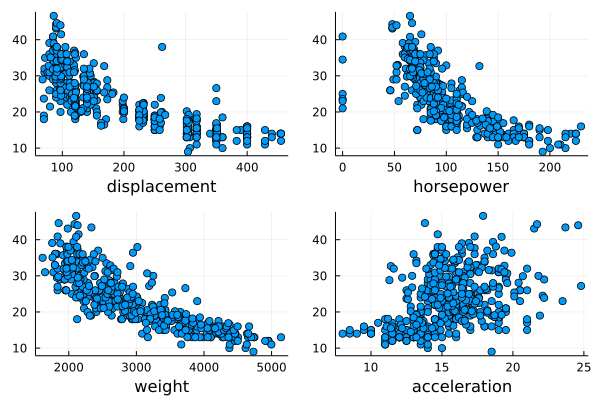

In [49]:
names=["displacement","horsepower","weight","acceleration"]
p1=plot(X[:,1],y,seriestype = :scatter, xlabel = names[1])
p2=plot(X[:,2],y,seriestype = :scatter,xlabel = names[2])
p3=plot(X[:,3],y,seriestype = :scatter,xlabel = names[3])
p4=plot(X[:,4],y,seriestype = :scatter,xlabel = names[4])
plot(p1, p2, p3, p4, layout = (2, 2), legend = false)

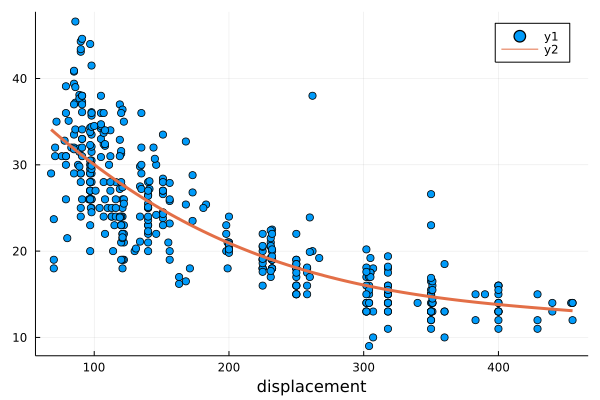

In [69]:
fit = curve_fit(Polynomial, X[:,1], y, 3);
X_new=range(minimum(X[:,1]),maximum(X[:,1]),length=100)
y_hat=fit.(X_new);
plot(X[:,1],y,seriestype = :scatter, xlabel = names[1])
plot!(X_new,y_hat,lw=3)

In [70]:
println("RSS : ",sum((y.-fit.(X[:,1])).^2));

RSS : 7530.593586866657


# Minimos Cuadrados Multivariable

In [72]:
n=size(X,1)
x1=X[:,1];
x2=X[:,2];
x3=X[:,3];
x4=X[:,4];
X_poly=hcat(ones(n),x1,x2,x3,x4,x1.^2,x2.^2,x3.^2,x4.^2);

In [73]:
print("El rango de la matriz X es : ",rank(X_poly));

El rango de la matriz X es : 9

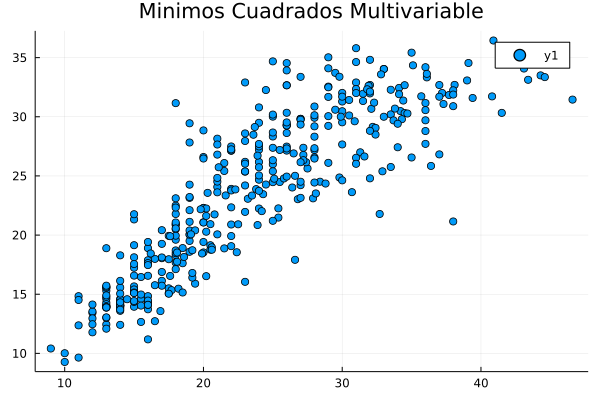

In [74]:
w=X_poly\y;
y_hat=X_poly*w;
plot(y,y_hat,seriestype = :scatter,title="Minimos Cuadrados Multivariable")


In [75]:
println(" RSS : ",sum((y.-y_hat).^2))

 RSS : 6180.353546130996


# Minimos Cuadrados Ordinarios

In [76]:
n=size(X,1)
x1=X[:,1];
x2=X[:,2];
x3=X[:,3];
x4=X[:,4];
X_ord=hcat(ones(n),x1,x2,x3,x4);

In [77]:
X

398×4 Matrix{Float64}:
 307.0  130.0  3504.0  12.0
 350.0  165.0  3693.0  11.5
 318.0  150.0  3436.0  11.0
 304.0  150.0  3433.0  12.0
 302.0  140.0  3449.0  10.5
 429.0  198.0  4341.0  10.0
 454.0  220.0  4354.0   9.0
 440.0  215.0  4312.0   8.5
 455.0  225.0  4425.0  10.0
 390.0  190.0  3850.0   8.5
   ⋮                   
 232.0  112.0  2835.0  14.7
 144.0   96.0  2665.0  13.9
 135.0   84.0  2370.0  13.0
 151.0   90.0  2950.0  17.3
 140.0   86.0  2790.0  15.6
  97.0   52.0  2130.0  24.6
 135.0   84.0  2295.0  11.6
 120.0   79.0  2625.0  18.6
 119.0   82.0  2720.0  19.4

In [78]:
print("El rango de la matriz X es : ",rank(X_ord));

El rango de la matriz X es : 5

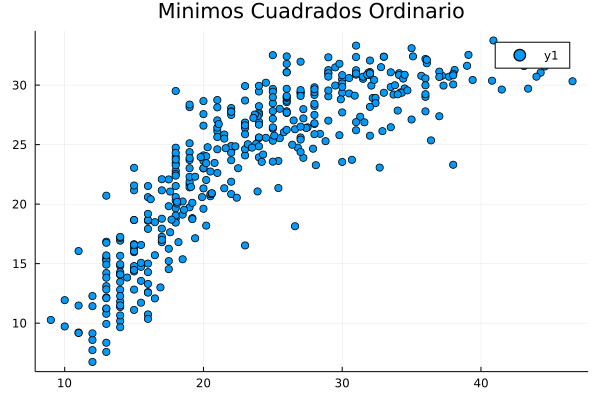

In [79]:
w=X_ord\y;
y_hat=X_ord*w;
plot(y,y_hat,seriestype = :scatter,title="Minimos Cuadrados Ordinario")

In [80]:
println(" RSS : ",sum((y.-y_hat).^2))

 RSS : 7177.794125127078


# Minimos Cuadrados con Interacciones

In [82]:
n=size(X,1)
x1=X[:,1];
x2=X[:,2];
x3=X[:,3];
x4=X[:,4];
X_inter=hcat(ones(n),x1,x2,x3,x4,x1.*x2,x1.*x3,x1.*x4,x2.*x3,x2.*x4,x3.*x4);

In [83]:
print("El rango de la matriz X es : ",rank(X_inter));

El rango de la matriz X es : 11

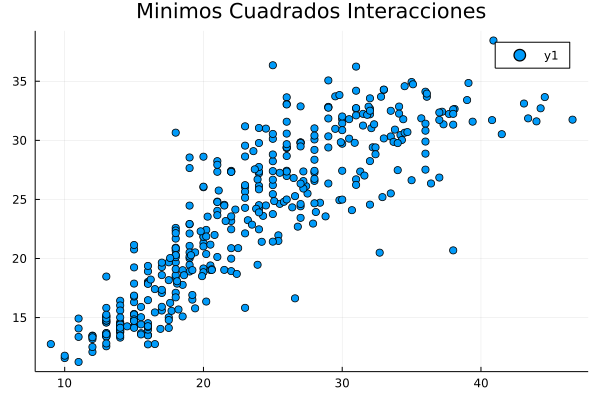

In [84]:
w=X_inter\y;
y_hat=X_inter*w;
plot(y,y_hat,seriestype = :scatter,title="Minimos Cuadrados Interacciones")

In [85]:
println(" RSS : ",sum((y.-y_hat).^2))

 RSS : 6132.462609283524


# Tarea 

Implemente un modelo predictivo para los precios de los cursos de Udemy, basado en el numero de suscriptores, reviews, cantidad de clases, nivel y duración de los contenidos.

Descargue los datos en:

https://www.kaggle.com/datasets/thedevastator/udemy-courses-revenue-generation-and-course-anal

In [1]:
using CSV,DataFrames

file="data/3.1-data-sheet-udemy-courses-web-development.csv"
data=CSV.read(file,DataFrame)

,course_id,course_title,url
,Int64?,String?,String?
1,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-from-scratch/
2,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs-basic/
3,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/
4,173548,Build Your First Website in 1 Week with HTML5 and CSS3,https://www.udemy.com/build-your-first-website-in-1-week/
5,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-developer-course-2/
6,473160,Web Design for Web Developers: Build Beautiful Websites!,https://www.udemy.com/web-design-secrets/
7,94430,Learn Javascript & JQuery From Scratch,https://www.udemy.com/learn-javascript-jquery-from-scratch/
8,130064,Practical PHP: Master the Basics and Code Dynamic Websites,https://www.udemy.com/code-dynamic-websites/
9,364426,JavaScript: Understanding the Weird Parts,https://www.udemy.com/understand-javascript/


In [24]:
data=dropmissing(data)

,course_id,course_title,url
,Int64,String,String
1,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-from-scratch/
2,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs-basic/
3,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/
4,173548,Build Your First Website in 1 Week with HTML5 and CSS3,https://www.udemy.com/build-your-first-website-in-1-week/
5,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-developer-course-2/
6,473160,Web Design for Web Developers: Build Beautiful Websites!,https://www.udemy.com/web-design-secrets/
7,94430,Learn Javascript & JQuery From Scratch,https://www.udemy.com/learn-javascript-jquery-from-scratch/
8,130064,Practical PHP: Master the Basics and Code Dynamic Websites,https://www.udemy.com/code-dynamic-websites/
9,364426,JavaScript: Understanding the Weird Parts,https://www.udemy.com/understand-javascript/


In [45]:
describe(data)

,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,course_id,7.06875e5,8324,738360.0,1277924
2,course_title,,1 Hour CSS,,jQuery in Action: Build 8 jQuery Projects
3,url,,https://www.udemy.com/1-hour-css/,,https://www.udemy.com/zend-framework-2creating-a-crud-application/
4,price,77.0366,0,50.0,200
5,num_subscribers,6635.02,19,2430.0,268923
6,num_reviews,357.356,0,65.0,27445
7,num_lectures,52.7672,5,32.0,779
8,level,,All Levels,,Intermediate Level
9,Rating,0.643051,0.0,0.76,1.0


In [25]:
y=data.price;
X=hcat(data.num_subscribers,data.num_reviews,data.num_lectures,data.content_duration);

In [26]:
size(X)

(1203, 4)

In [44]:
X

1203×4 Matrix{Float64}:
 268923.0   8629.0   45.0  10.5
 161029.0    279.0   27.0   3.5
 121584.0  27445.0  342.0  43.0
 120291.0   5924.0   30.0   3.0
 114512.0  22412.0  304.0  30.5
  98867.0   6512.0   20.0   3.0
  84897.0   2685.0   10.0   2.0
  83737.0   4598.0   45.0   6.5
  79612.0  16976.0   85.0  11.5
  73783.0  19649.0  329.0  22.0
      ⋮                    
     88.0      8.0   55.0   4.5
     81.0     14.0   33.0   1.0
     61.0      9.0   44.0   2.0
     55.0     13.0   31.0   1.5
     50.0      5.0   60.0   5.0
     44.0      0.0   68.0   8.5
     34.0      2.0   21.0   1.5
     25.0      4.0   66.0  12.5
     19.0      2.0   33.0   4.0

In [27]:
using LinearAlgebra,Plots;

typeof(X)

Matrix{Float64} (alias for Array{Float64, 2})

In [30]:
X_inv=inv(X'*X)

4×4 Matrix{Float64}:
  6.03304e-12  -3.65466e-11  -4.7295e-11  -1.21851e-9
 -3.65466e-11   5.85875e-10  -1.06741e-9  -3.49539e-9
 -4.7295e-11   -1.06741e-9    7.55706e-7  -6.0967e-6
 -1.21851e-9   -3.49539e-9   -6.0967e-6    6.08654e-5

In [31]:
X_pinv=X_inv*X'

4×1203 Matrix{Float64}:
  1.29214e-6   9.55756e-7   -3.38072e-7  …  -1.83482e-8   -6.39324e-9
 -4.85746e-6  -5.76266e-6    1.11205e-5     -1.12712e-7   -4.87289e-8
 -5.1938e-5   -8.84806e-6   -3.87521e-5     -2.63376e-5    5.4847e-7
  6.88865e-6  -0.000148772   0.00028806      0.000358391   4.22405e-5

In [39]:
pinv(X)*X

4×4 Matrix{Float64}:
  1.0          -1.4386e-16   -1.13841e-18   1.21973e-18
  1.56125e-16   1.0          -9.32414e-18   9.73071e-18
 -5.88418e-15   2.70617e-15   1.0          -1.00961e-15
 -6.4948e-14    6.10623e-16  -1.80411e-15   1.0

In [40]:
w=X_pinv*y

4-element Vector{Float64}:
  0.0007796062746992133
 -0.0038960962501906576
  0.5982067001757728
  2.1409076197474537

In [42]:
y_hat=X*w

1203-element Vector{Float64}:
 225.4334751832994
 148.09696552859836
 284.5050068258014
  95.06806806822915
 249.10748382481557
  70.09281164220337
  65.98909771262983
  88.20284110237961
  71.39389194015357
 224.87726653840906
   ⋮
  42.57288938070305
  21.89033148629592
  30.615401163733846
  21.747998228926118
  46.616439941767645
  58.910073055892674
  15.792416554151803
  66.24689323031089
  28.311471911509223

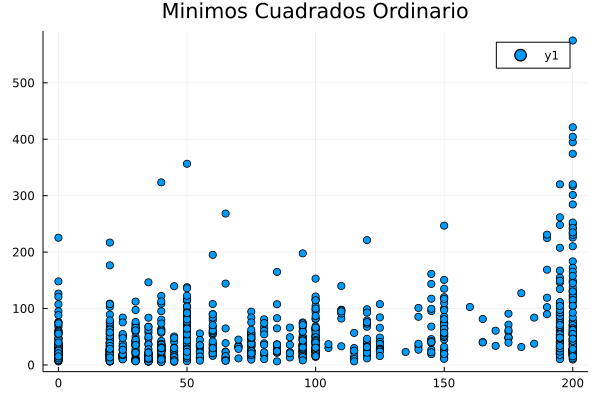

In [43]:
using Plots

plot(y,y_hat,seriestype = :scatter,title="Minimos Cuadrados Ordinario")